### **PROBLEM STATEMENT**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

### **OBJECTIVE**

Create a Clustering Model to identify customer segments that are suitable for marketing new products based on customer personality in transaction activities with a Silhouette Score > 0.7

### **CONTENT**

**ID**: Customer's unique identifier\
**Year_Birth**: Customer's birth year\
**Education**: Customer's education level\
**Marital_Status**: Customer's marital status\
**Income**: Customer's yearly household income\
**Kidhome**: Number of children in customer's household\
**Teenhome**: Number of teenagers in customer's household\
**Dt_Customer**: Date of customer's enrollment with the company\
**Recency**: Number of days since customer's last purchase\
**Complain**: 1 if the customer complained in the last 2 years, 0 otherwise

**MntWines**: Amount spent on wine in last 2 years\
**MntFruits**: Amount spent on fruits in last 2 years\
**MntMeatProducts**: Amount spent on meat in last 2 years\
**MntFishProducts**: Amount spent on fish in last 2 years\
**MntSweetProducts**: Amount spent on sweets in last 2 years\
**MntGoldProds**: Amount spent on gold in last 2 years

**NumDealsPurchases**: Number of purchases made with a discount\
**AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise\
**AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise\
**AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise\
**AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise\
**AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise\
**Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise

**NumWebPurchases**: Number of purchases made through the company’s website\
**NumCatalogPurchases**: Number of purchases made using a catalogue\
**NumStorePurchases**: Number of purchases made directly in stores\
**NumWebVisitsMonth**: Number of visits to company’s website in the last month

### **Import Package**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

C:\Users\muham\AppData\Local\Temp\ipykernel_137192\3347886854.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pd.set_option('display.max_columns', None)

### **Data**

In [3]:
data = pd.read_csv('marketing_campaign.csv',sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

### **Data Understanding**

**Year_Birth**

In [5]:
data0 = pd.DataFrame(\
                     data.groupby(by=["Year_Birth"])['Year_Birth']\
                     .count()\
                     .reset_index(name='Amount'))

<Axes: xlabel='Year_Birth'>

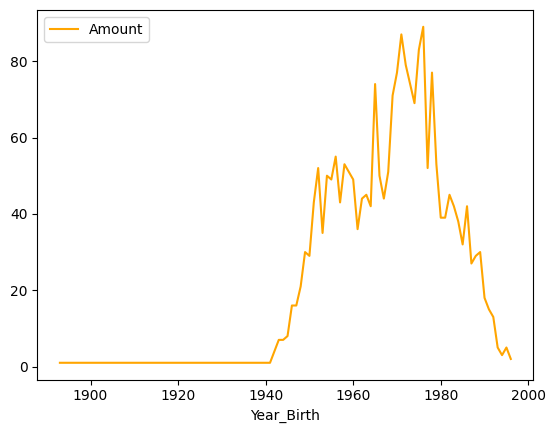

In [6]:
data0.plot('Year_Birth', 'Amount', color='orange')

In [7]:
data1 = pd.DataFrame(\
                     data.groupby(by=["Year_Birth"])[["MntWines", 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]\
                     .mean()\
                     .reset_index())
data1.head()

,Year_Birth,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1893,8.0,0.0,5.0,7.0,0.0,2.0
1,1899,755.0,144.0,562.0,104.0,64.0,224.0
2,1900,15.0,6.0,8.0,7.0,4.0,25.0
3,1940,144.0,0.0,7.0,0.0,0.0,6.0
4,1941,1285.0,42.0,716.0,55.0,0.0,21.0


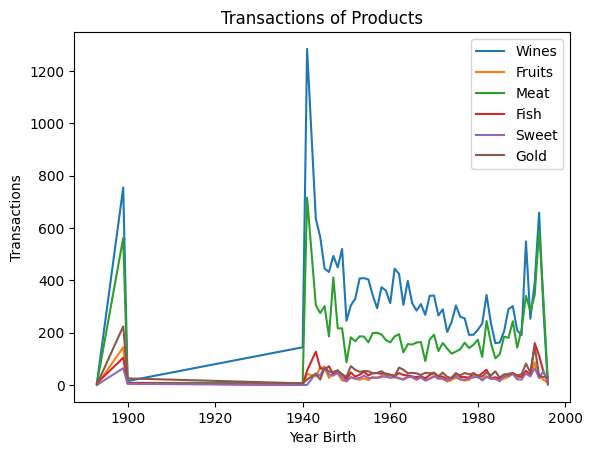

In [8]:

fig = plt.figure()
ax = fig.add_subplot()
x1 = data1['Year_Birth']
y1 = data1['MntWines']
y2 = data1['MntFruits']
y3 = data1['MntMeatProducts']
y4 = data1['MntFishProducts']
y5 = data1['MntSweetProducts']
y6 = data1['MntGoldProds']
ax.plot(x1, y1, label='Wines')
ax.plot(x1, y2, label='Fruits')
ax.plot(x1, y3, label='Meat')
ax.plot(x1, y4, label='Fish')
ax.plot(x1, y5, label='Sweet')
ax.plot(x1, y6, label='Gold')
ax.set_xlabel('Year Birth')
ax.set_ylabel('Transactions')
ax.set_title("Transactions of Products")
ax.legend()

In [9]:
data11 = pd.DataFrame(\
                     data.groupby(by=["Year_Birth"])[["NumDealsPurchases", 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]\
                     .mean()\
                     .reset_index())
data11.head()

,Year_Birth,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,1893,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1899,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1900,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1940,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1941,0.0,0.0,0.0,0.0,0.0,1.0,0.0


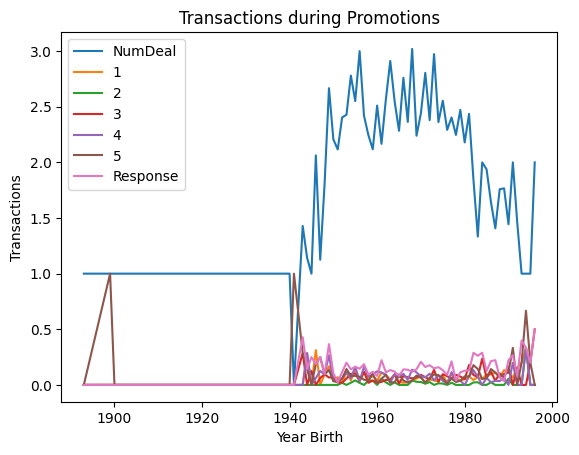

In [10]:

fig = plt.figure()
ax = fig.add_subplot()
x1 = data11['Year_Birth']
y1 = data11['NumDealsPurchases']
y2 = data11['AcceptedCmp1']
y3 = data11['AcceptedCmp2']
y4 = data11['AcceptedCmp3']
y5 = data11['AcceptedCmp4']
y6 = data11['AcceptedCmp5']
y7 = data11['Response']
ax.plot(x1, y1, label='NumDeal')
ax.plot(x1, y2, label='1')
ax.plot(x1, y3, label='2')
ax.plot(x1, y4, label='3')
ax.plot(x1, y5, label='4')
ax.plot(x1, y6, label='5')
ax.plot(x1, y7, label='Response')
ax.set_xlabel('Year Birth')
ax.set_ylabel('Transactions')
ax.set_title("Transactions during Promotions")
ax.legend()

In [11]:
data111 = pd.DataFrame(\
                     data.groupby(by=["Year_Birth"])[["NumWebPurchases", 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]\
                     .mean()\
                     .reset_index())
data111.head()

,Year_Birth,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1893,1.0,0.0,2.0,4.0
1,1899,4.0,6.0,4.0,1.0
2,1900,2.0,1.0,2.0,5.0
3,1940,3.0,1.0,4.0,5.0
4,1941,7.0,10.0,5.0,2.0


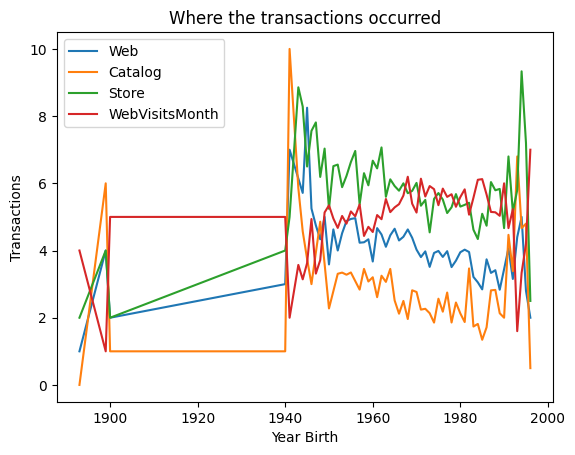

In [12]:

fig = plt.figure()
ax = fig.add_subplot()
x1 = data111['Year_Birth']
y1 = data111['NumWebPurchases']
y2 = data111['NumCatalogPurchases']
y3 = data111['NumStorePurchases']
y4 = data111['NumWebVisitsMonth']
ax.plot(x1, y1, label='Web')
ax.plot(x1, y2, label='Catalog')
ax.plot(x1, y3, label='Store')
ax.plot(x1, y4, label='WebVisitsMonth')
ax.set_xlabel('Year Birth')
ax.set_ylabel('Transactions')
ax.set_title("Where the transactions occurred")
ax.legend()

**Eduaction**

In [13]:
data.groupby(('Education'))['Education'].count()

Education
2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
Name: Education, dtype: int64

In [14]:
data2 = pd.DataFrame(\
                     data.groupby(by=["Education"])[["MntWines", 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]\
                     .mean()\
                     .reset_index())
data2

,Education,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,2n Cycle,198.182266,28.955665,141.256158,47.482759,34.251232,46.399015
1,Basic,7.240741,11.111111,11.444444,17.055556,12.111111,22.833333
2,Graduation,284.268855,30.774623,179.488909,43.149956,31.367347,50.849157
3,Master,333.075676,21.654054,163.378378,32.100000,21.175676,40.397297
4,PhD,404.495885,20.049383,168.602881,26.728395,20.222222,32.310700


In [15]:
data22 = pd.DataFrame(\
                     data.groupby(by=["Education"])[["NumDealsPurchases", 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]\
                     .mean()\
                     .reset_index())
data22

,Education,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,2n Cycle,2.246305,0.068966,0.009852,0.073892,0.049261,0.049261,0.108374
1,Basic,1.796296,0.000000,0.000000,0.111111,0.000000,0.000000,0.037037
2,Graduation,2.309672,0.072760,0.014197,0.069210,0.071872,0.076309,0.134871
3,Master,2.427027,0.048649,0.005405,0.064865,0.083784,0.075676,0.154054
4,PhD,2.374486,0.061728,0.020576,0.082305,0.092593,0.080247,0.207819


In [16]:
data222 = pd.DataFrame(\
                     data.groupby(by=["Education"])[["NumWebPurchases", 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]\
                     .mean()\
                     .reset_index())
data222

,Education,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,2n Cycle,3.729064,2.320197,5.507389,5.453202
1,Basic,1.888889,0.481481,2.851852,6.870370
2,Graduation,4.125111,2.725821,5.829636,5.287489
3,Master,4.032432,2.570270,5.897297,5.178378
4,PhD,4.423868,2.969136,6.061728,5.259259


**Marital_Status**

In [17]:
data.groupby(('Marital_Status'))['Marital_Status'].count()

Marital_Status
Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
Name: Marital_Status, dtype: int64

In [18]:
data3 = pd.DataFrame(\
                     data.groupby(by=["Marital_Status"])[["MntWines", 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]\
                     .mean()\
                     .reset_index())
data3

,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Absurd,355.500000,84.500000,312.500000,205.500000,30.500000,204.000000
1,Alone,184.666667,4.000000,26.333333,7.666667,7.000000,27.000000
2,Divorced,324.844828,27.426724,150.206897,35.043103,26.818966,46.288793
3,Married,299.480324,25.734954,160.681713,35.380787,26.701389,42.822917
4,Single,288.331250,26.835417,182.108333,38.216667,27.262500,43.729167
5,Together,306.825862,25.350000,168.103448,38.991379,26.122414,42.994828
6,Widow,369.272727,33.090909,189.285714,51.389610,39.012987,56.766234
7,YOLO,322.000000,3.000000,50.000000,4.000000,3.000000,42.000000


In [19]:
data33 = pd.DataFrame(\
                     data.groupby(by=["Marital_Status"])[["NumDealsPurchases", 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]\
                     .mean()\
                     .reset_index())
data33

,Marital_Status,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,Absurd,2.000000,0.500000,0.000000,0.000000,0.000000,0.500000,0.500000
1,Alone,3.666667,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333
2,Divorced,2.435345,0.051724,0.021552,0.086207,0.077586,0.056034,0.206897
3,Married,2.392361,0.072917,0.008102,0.072917,0.072917,0.076389,0.113426
4,Single,2.131250,0.064583,0.010417,0.079167,0.068750,0.064583,0.220833
5,Together,2.324138,0.055172,0.020690,0.063793,0.074138,0.075862,0.103448
6,Widow,2.337662,0.064935,0.012987,0.051948,0.129870,0.103896,0.246753
7,YOLO,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000


In [20]:
data333 = pd.DataFrame(\
                     data.groupby(by=["Marital_Status"])[["NumWebPurchases", 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]\
                     .mean()\
                     .reset_index())
data333

,Marital_Status,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,Absurd,3.500000,7.500000,6.500000,1.500000
1,Alone,5.000000,0.666667,4.000000,6.333333
2,Divorced,4.310345,2.672414,5.818966,5.487069
3,Married,4.087963,2.625000,5.850694,5.364583
4,Single,3.872917,2.600000,5.639583,5.283333
5,Together,4.081034,2.675862,5.736207,5.260345
6,Widow,4.623377,3.324675,6.415584,4.883117
7,YOLO,7.000000,1.000000,6.000000,8.000000


**Kidhome**

In [21]:
data.groupby(('Kidhome'))['Kidhome'].count()

Kidhome
0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [22]:
data4 = pd.DataFrame(\
                     data.groupby(by=["Kidhome"])[["MntWines", 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]\
                     .mean()\
                     .reset_index())
data4

,Kidhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,451.173241,39.392885,253.996133,56.162413,40.498840,60.037123
1,1,104.403782,8.517241,48.862069,12.311457,8.932147,22.408231
2,2,74.791667,6.770833,33.833333,7.729167,4.708333,17.416667


In [23]:
data44 = pd.DataFrame(\
                     data.groupby(by=["Kidhome"])[["NumDealsPurchases", 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]\
                     .mean()\
                     .reset_index())
data44

,Kidhome,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,0,1.944316,0.102862,0.021655,0.067285,0.111369,0.119876,0.171694
1,1,2.845384,0.010011,0.002225,0.083426,0.025584,0.008899,0.122358
2,2,2.833333,0.041667,0.000000,0.020833,0.000000,0.000000,0.041667


In [24]:
data444 = pd.DataFrame(\
                     data.groupby(by=["Kidhome"])[["NumWebPurchases", 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]\
                     .mean()\
                     .reset_index())
data444

,Kidhome,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0,4.973705,3.958237,7.217324,4.353442
1,1,2.875417,0.902113,3.863181,6.629588
2,2,2.791667,0.708333,3.437500,6.666667


**Teenhome**

In [25]:
data.groupby(('Teenhome'))['Teenhome'].count()

Teenhome
0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

In [26]:
data5 = pd.DataFrame(\
                     data.groupby(by=["Teenhome"])[["MntWines", 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]\
                     .mean()\
                     .reset_index())
data5

,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,304.822971,33.310017,227.120035,48.658031,33.631261,45.256477
1,1,300.009709,18.866990,101.432039,25.697087,20.233010,42.587379
2,2,361.942308,17.519231,124.769231,23.903846,16.076923,44.942308


In [27]:
data55 = pd.DataFrame(\
                     data.groupby(by=["Teenhome"])[["NumDealsPurchases", 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]\
                     .mean()\
                     .reset_index())
data55

,Teenhome,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,0,1.588946,0.099309,0.015544,0.084629,0.065630,0.124352,0.204663
1,1,3.093204,0.026214,0.010680,0.059223,0.082524,0.015534,0.089320
2,2,3.500000,0.038462,0.019231,0.076923,0.115385,0.057692,0.096154


In [28]:
data555 = pd.DataFrame(\
                     data.groupby(by=["Teenhome"])[["NumWebPurchases", 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]\
                     .mean()\
                     .reset_index())
data555

,Teenhome,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0,3.661485,2.991364,5.637306,4.981002
1,1,4.525243,2.304854,5.938835,5.683495
2,2,4.788462,2.403846,6.250000,5.519231


**Complain**

In [29]:
data.groupby(('Complain'))['Complain'].count()

Complain
0    2219
1      21
Name: Complain, dtype: int64

In [30]:
data6 = pd.DataFrame(\
                     data.groupby(by=["Complain"])[["MntWines", 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]\
                     .mean()\
                     .reset_index())
data6

,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,305.212708,26.322217,167.465525,37.636773,27.153222,44.178459
1,1,169.000000,24.190476,112.476190,25.761905,17.523810,27.476190


In [31]:
data66 = pd.DataFrame(\
                     data.groupby(by=["Complain"])[["NumDealsPurchases", 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']]\
                     .mean()\
                     .reset_index())
data66

,Complain,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,0,2.324921,0.064894,0.01352,0.072555,0.075259,0.073006,0.149166
1,1,2.333333,0.000000,0.00000,0.095238,0.000000,0.047619,0.142857


In [32]:
data666 = pd.DataFrame(\
                     data.groupby(by=["Complain"])[["NumWebPurchases", 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]\
                     .mean()\
                     .reset_index())
data666

,Complain,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0,4.089229,2.667868,5.795403,5.311852
1,1,3.619048,2.047619,5.238095,5.809524


### **Data Preparation**

In [33]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [34]:
data = data.dropna()

In [35]:
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [36]:
data.duplicated().sum()

0

In [37]:
data.count()

ID                     2216
Year_Birth             2216
Education              2216
Marital_Status         2216
Income                 2216
Kidhome                2216
Teenhome               2216
Dt_Customer            2216
Recency                2216
MntWines               2216
MntFruits              2216
MntMeatProducts        2216
MntFishProducts        2216
MntSweetProducts       2216
MntGoldProds           2216
NumDealsPurchases      2216
NumWebPurchases        2216
NumCatalogPurchases    2216
NumStorePurchases      2216
NumWebVisitsMonth      2216
AcceptedCmp3           2216
AcceptedCmp4           2216
AcceptedCmp5           2216
AcceptedCmp1           2216
AcceptedCmp2           2216
Complain               2216
Z_CostContact          2216
Z_Revenue              2216
Response               2216
dtype: int64

In [38]:
from scipy import stats
z_scores = stats.zscore(data[['Year_Birth', 'Income', 'Recency']])
data = data[(z_scores < 3).all(axis=1)]

In [39]:
data.count()

ID                     2208
Year_Birth             2208
Education              2208
Marital_Status         2208
Income                 2208
Kidhome                2208
Teenhome               2208
Dt_Customer            2208
Recency                2208
MntWines               2208
MntFruits              2208
MntMeatProducts        2208
MntFishProducts        2208
MntSweetProducts       2208
MntGoldProds           2208
NumDealsPurchases      2208
NumWebPurchases        2208
NumCatalogPurchases    2208
NumStorePurchases      2208
NumWebVisitsMonth      2208
AcceptedCmp3           2208
AcceptedCmp4           2208
AcceptedCmp5           2208
AcceptedCmp1           2208
AcceptedCmp2           2208
Complain               2208
Z_CostContact          2208
Z_Revenue              2208
Response               2208
dtype: int64

In [40]:
import datetime
date = pd.to_datetime(data['Dt_Customer'], format = 'mixed')
data['Dt_Customer'] = pd.DatetimeIndex(date).year
data['Dt_Customer']

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: Dt_Customer, Length: 2208, dtype: int32

Splitting

In [41]:
df0 = data
df1 = data.iloc[:, 1:9]
df1 = df1.assign(LocationSpecificColumn=pd.Series(data['Complain']).values)
df1.rename(columns = {'LocationSpecificColumn':'Complain'}, inplace = True)
df1

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain
0,1957,Graduation,Single,58138.0,0,0,2012,58,0
1,1954,Graduation,Single,46344.0,1,1,2014,38,0
2,1965,Graduation,Together,71613.0,0,0,2013,26,0
3,1984,Graduation,Together,26646.0,1,0,2014,26,0
4,1981,PhD,Married,58293.0,1,0,2014,94,0
...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,2013,46,0
2236,1946,PhD,Together,64014.0,2,1,2014,56,0
2237,1981,Graduation,Divorced,56981.0,0,0,2014,91,0
2238,1956,Master,Together,69245.0,0,1,2014,8,0


In [42]:
df2 = data.iloc[:, 9:15]
df2

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


In [43]:
df3 = data.iloc[:, 20:25]
df3 = df3.assign(LocationSpecificColumn=pd.Series(data['NumDealsPurchases']).values)
df3.rename(columns = {'LocationSpecificColumn':'NumDealsPurchases'}, inplace = True)
df3 = df3.assign(LocationSpecificColumn=pd.Series(data['Response']).values)
df3.rename(columns = {'LocationSpecificColumn':'Response'}, inplace = True)
df3


,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,NumDealsPurchases,Response
0,0,0,0,0,0,3,1
1,0,0,0,0,0,2,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,2,0
4,0,0,0,0,0,5,0
...,...,...,...,...,...,...,...
2235,0,0,0,0,0,2,0
2236,0,0,0,1,0,7,0
2237,0,1,0,0,0,1,0
2238,0,0,0,0,0,2,0


In [44]:
df4 = data.iloc[:, 16:20]
df4

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,8,10,4,7
1,1,1,2,5
2,8,2,10,4
3,2,0,4,6
4,5,3,6,5
...,...,...,...,...
2235,9,3,4,5
2236,8,2,5,7
2237,2,3,13,6
2238,6,5,10,3


Encoding

In [45]:
df1 = pd.get_dummies(df1, dtype=int)
df1

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,2012,58,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,2014,38,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,2013,26,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,2014,26,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,2014,94,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,2013,46,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2236,1946,64014.0,2,1,2014,56,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2237,1981,56981.0,0,0,2014,91,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2238,1956,69245.0,0,1,2014,8,0,0,0,0,1,0,0,0,0,0,0,1,0,0


Standardization

In [46]:
predname_num1 = df2.columns
predname_num1

Index(['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds'],
      dtype='object')

In [47]:
predname_num2 = df3.columns
predname_num2

Index(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'NumDealsPurchases', 'Response'],
      dtype='object')

In [48]:
predname_num3 = df4.columns
predname_num3

Index(['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth'],
      dtype='object')

In [49]:
from sklearn.preprocessing import StandardScaler
pt = StandardScaler()
X_num1 = pd.DataFrame(pt.fit_transform(df2))
X_num1.head()

,0,1,2,3,4,5
0,0.974689,1.545554,1.747688,2.449620,1.480933,0.846621
1,-0.874529,-0.638540,-0.731613,-0.652518,-0.635460,-0.735161
2,0.355320,0.566478,-0.176066,1.336500,-0.148933,-0.040720
3,-0.874529,-0.563226,-0.667335,-0.506535,-0.586807,-0.754451
4,-0.394444,0.415851,-0.217388,0.150388,-0.002975,-0.561551


In [50]:
X_num2 = pd.DataFrame(pt.fit_transform(df3))
X_num2.head()

,0,1,2,3,4,5,6
0,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,0.362555,2.372895
1,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.167943,-0.421426
2,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.698440,-0.421426
3,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.167943,-0.421426
4,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,1.423550,-0.421426


In [51]:
X_num3 = pd.DataFrame(pt.fit_transform(df4))
X_num3.head()

,0,1,2,3
0,1.426013,2.628870,-0.561314,0.690245
1,-1.132369,-0.587934,-1.178383,-0.138499
2,1.426013,-0.230512,1.289891,-0.552871
3,-0.766886,-0.945357,-0.561314,0.275873
4,0.329564,0.126911,0.055754,-0.138499


In [52]:
X_num1.columns = predname_num1
df2 = X_num1
df2.head()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0.974689,1.545554,1.747688,2.449620,1.480933,0.846621
1,-0.874529,-0.638540,-0.731613,-0.652518,-0.635460,-0.735161
2,0.355320,0.566478,-0.176066,1.336500,-0.148933,-0.040720
3,-0.874529,-0.563226,-0.667335,-0.506535,-0.586807,-0.754451
4,-0.394444,0.415851,-0.217388,0.150388,-0.002975,-0.561551


In [53]:
X_num2.columns = predname_num2
df3 = X_num2
df3.head()

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,NumDealsPurchases,Response
0,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,0.362555,2.372895
1,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.167943,-0.421426
2,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.698440,-0.421426
3,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.167943,-0.421426
4,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,1.423550,-0.421426


In [54]:
X_num3.columns = predname_num3
df4 = X_num3
df4.head()

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1.426013,2.628870,-0.561314,0.690245
1,-1.132369,-0.587934,-1.178383,-0.138499
2,1.426013,-0.230512,1.289891,-0.552871
3,-0.766886,-0.945357,-0.561314,0.275873
4,0.329564,0.126911,0.055754,-0.138499


Correlation

In [55]:
corrtest1 = df1.corr().abs()
corrtest2 = df2.corr().abs()
corrtest3 = df3.corr().abs()
corrtest4 = df4.corr().abs()

In [56]:
upper = corrtest1.where(np.triu(np.ones(corrtest1.shape), k=1).astype(bool))
upper1 = corrtest2.where(np.triu(np.ones(corrtest2.shape), k=1).astype(bool))
upper2 = corrtest3.where(np.triu(np.ones(corrtest3.shape), k=1).astype(bool))
upper3 = corrtest4.where(np.triu(np.ones(corrtest4.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop1 = [column for column in upper1.columns if any(upper1[column] > 0.7)]
to_drop2 = [column for column in upper2.columns if any(upper2[column] > 0.7)]
to_drop3 = [column for column in upper3.columns if any(upper3[column] > 0.7)]

df1 = df1.drop(to_drop, axis=1)
df2 = df2.drop(to_drop1, axis=1)
df3 = df3.drop(to_drop2, axis=1)
df4 = df4.drop(to_drop3, axis=1)

df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df3.reset_index(drop=True, inplace=True)
df4.reset_index(drop=True, inplace=True)

Merger

In [57]:
data_combined1 = pd.concat([df1, df2], axis=1)
data_combined1


,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1957,58138.0,0,0,2012,58,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0.974689,1.545554,1.747688,2.449620,1.480933,0.846621
1,1954,46344.0,1,1,2014,38,0,0,0,1,0,0,0,0,0,0,1,0,0,0,-0.874529,-0.638540,-0.731613,-0.652518,-0.635460,-0.735161
2,1965,71613.0,0,0,2013,26,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.355320,0.566478,-0.176066,1.336500,-0.148933,-0.040720
3,1984,26646.0,1,0,2014,26,0,0,0,1,0,0,0,0,0,0,0,1,0,0,-0.874529,-0.563226,-0.667335,-0.506535,-0.586807,-0.754451
4,1981,58293.0,1,0,2014,94,0,0,0,0,0,1,0,0,0,1,0,0,0,0,-0.394444,0.415851,-0.217388,0.150388,-0.002975,-0.561551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,1967,61223.0,0,1,2013,46,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1.193988,0.415851,0.076455,0.077396,2.210723,3.913734
2204,1946,64014.0,2,1,2014,56,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0.296050,-0.663644,-0.621422,-0.689014,-0.659786,-0.696581
2205,1981,56981.0,0,0,2014,91,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1.783722,0.541373,0.237151,-0.105082,-0.367870,-0.387941
2206,1956,69245.0,0,1,2014,8,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.361247,0.089492,0.223377,0.770816,0.070004,0.325790


In [58]:
data_combined2 = pd.concat([df1, df3], axis=1, join='inner')
data_combined2


,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,NumDealsPurchases,Response
0,1957,58138.0,0,0,2012,58,0,0,0,1,0,0,0,0,0,0,1,0,0,0,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,0.362555,2.372895
1,1954,46344.0,1,1,2014,38,0,0,0,1,0,0,0,0,0,0,1,0,0,0,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.167943,-0.421426
2,1965,71613.0,0,0,2013,26,0,0,0,1,0,0,0,0,0,0,0,1,0,0,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.698440,-0.421426
3,1984,26646.0,1,0,2014,26,0,0,0,1,0,0,0,0,0,0,0,1,0,0,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.167943,-0.421426
4,1981,58293.0,1,0,2014,94,0,0,0,0,0,1,0,0,0,1,0,0,0,0,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,1.423550,-0.421426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,1967,61223.0,0,1,2013,46,0,0,0,1,0,0,0,0,0,1,0,0,0,0,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.167943,-0.421426
2204,1946,64014.0,2,1,2014,56,0,0,0,0,0,1,0,0,0,0,0,1,0,0,-0.282324,-0.283258,-0.281387,3.814354,-0.117363,2.484545,-0.421426
2205,1981,56981.0,0,0,2014,91,0,0,0,1,0,0,0,0,1,0,0,0,0,0,-0.282324,3.530356,-0.281387,-0.262168,-0.117363,-0.698440,-0.421426
2206,1956,69245.0,0,1,2014,8,0,0,0,0,1,0,0,0,0,0,0,1,0,0,-0.282324,-0.283258,-0.281387,-0.262168,-0.117363,-0.167943,-0.421426


In [59]:
data_combined3 = pd.concat([df1, df4], axis=1, join='inner')
data_combined3


,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,Complain,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1957,58138.0,0,0,2012,58,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1.426013,2.628870,-0.561314,0.690245
1,1954,46344.0,1,1,2014,38,0,0,0,1,0,0,0,0,0,0,1,0,0,0,-1.132369,-0.587934,-1.178383,-0.138499
2,1965,71613.0,0,0,2013,26,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1.426013,-0.230512,1.289891,-0.552871
3,1984,26646.0,1,0,2014,26,0,0,0,1,0,0,0,0,0,0,0,1,0,0,-0.766886,-0.945357,-0.561314,0.275873
4,1981,58293.0,1,0,2014,94,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0.329564,0.126911,0.055754,-0.138499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2203,1967,61223.0,0,1,2013,46,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1.791497,0.126911,-0.561314,-0.138499
2204,1946,64014.0,2,1,2014,56,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1.426013,-0.230512,-0.252780,0.690245
2205,1981,56981.0,0,0,2014,91,0,0,0,1,0,0,0,0,1,0,0,0,0,0,-0.766886,0.126911,2.215493,0.275873
2206,1956,69245.0,0,1,2014,8,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.695047,0.841756,1.289891,-0.967243


## **Modeling & Evaluation**

1. K-Means
2. K-Medoid

#

1. Experiment 01 : data_combined1
2. Experiment 02 : data_combined2
3. Experiment 03 : data_combined3
4. Experiment 1 : df1
5. Experiment 2 : df2
6. Experiment 3 : df3
7. Experiment 4 : df4


### K-Means

In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

Experiment 01

In [61]:
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_combined1)
    silhouette_avg = silhouette_score(data_combined1, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    df0['Clustering_KMeans_Exp01_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Means) -3 : 0.550068799713925
Silhouette Score (K-Means) -4 : 0.5385437489644036
Silhouette Score (K-Means) -5 : 0.5401949512861869


Experiment 02

In [62]:
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_combined2)
    silhouette_avg = silhouette_score(data_combined2, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    df0['Clustering_KMeans_Exp02_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Means) -3 : 0.5500687397493538
Silhouette Score (K-Means) -4 : 0.5385436510659447
Silhouette Score (K-Means) -5 : 0.5401947980314091


Experiment 03

In [63]:
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(data_combined3)
    silhouette_avg = silhouette_score(data_combined3, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    df0['Clustering_KMeans_Exp03_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Means) -3 : 0.5500688315589416
Silhouette Score (K-Means) -4 : 0.5385438017574232
Silhouette Score (K-Means) -5 : 0.5401950349466926


Experiment 1

In [64]:
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(df1)
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    df0['Clustering_KMeans_Exp1_'+str(n_clusters)] = cluster_labels


Silhouette Score (K-Means) -3 : 0.5500688808127995
Silhouette Score (K-Means) -4 : 0.5385438790202127
Silhouette Score (K-Means) -5 : 0.5401951526908825


Experiment 2

In [65]:
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(df2)
    silhouette_avg = silhouette_score(df2, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    df0['Clustering_KMeans_Exp2_'+str(n_clusters)] = cluster_labels


Silhouette Score (K-Means) -3 : 0.45655740066623557
Silhouette Score (K-Means) -4 : 0.44795090517309527
Silhouette Score (K-Means) -5 : 0.4390773068637428


Experiment 3

In [66]:
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(df3)
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    df0['Clustering_KMeans_Exp3_'+str(n_clusters)] = cluster_labels


Silhouette Score (K-Means) -3 : 0.401760409387719
Silhouette Score (K-Means) -4 : 0.46068896183849584
Silhouette Score (K-Means) -5 : 0.49489453512323583


Experiment 4

In [67]:
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(df4)
    silhouette_avg = silhouette_score(df4, cluster_labels)
    print(f"Silhouette Score (K-Means) -"+str(n_clusters)+" : "+str(silhouette_avg))
    df0['Clustering_KMeans_Exp4_'+str(n_clusters)] = cluster_labels


Silhouette Score (K-Means) -3 : 0.40580600379191745
Silhouette Score (K-Means) -4 : 0.3365591795705003
Silhouette Score (K-Means) -5 : 0.31535408605499055


### K-Medoids

In [68]:
from sklearn_extra.cluster import KMedoids

Experiment 01

In [69]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(data_combined1)
    silhouette_avg = silhouette_score(data_combined1, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    df0['Clustering_KMedoids_Exp01_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.5462256917920066
Silhouette Score (K-Medoids) -4 : 0.5349873610864607
Silhouette Score (K-Medoids) -5 : 0.5376861424163216


Experiment 02

In [70]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(data_combined2)
    silhouette_avg = silhouette_score(data_combined2, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    df0['Clustering_KMedoids_Exp02_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.5462256291551957
Silhouette Score (K-Medoids) -4 : 0.534987258673737
Silhouette Score (K-Medoids) -5 : 0.5376859888094353


Experiment 03

In [71]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(data_combined3)
    silhouette_avg = silhouette_score(data_combined3, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    df0['Clustering_KMedoids_Exp03_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.5462257226139396
Silhouette Score (K-Medoids) -4 : 0.5349874170045247
Silhouette Score (K-Medoids) -5 : 0.5376862228570742


Experiment 1

In [72]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(df1)
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    df0['Clustering_KMedoids_Exp1_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.5462257726407281
Silhouette Score (K-Medoids) -4 : 0.5349874974725601
Silhouette Score (K-Medoids) -5 : 0.5376863424786261


Experiment 2

In [73]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(df2)
    silhouette_avg = silhouette_score(df2, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    df0['Clustering_KMedoids_Exp2_'+str(n_clusters)] = cluster_labels

Silhouette Score (K-Medoids) -3 : 0.3791862534879288
Silhouette Score (K-Medoids) -4 : 0.2890482939258987
Silhouette Score (K-Medoids) -5 : 0.2138460771706863


Experiment 3

In [74]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(df3)
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    df0['Clustering_KMedoids_Exp3_'+str(n_clusters)] = cluster_labels

d:\Data-Analysis-and-Science\.venv\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
d:\Data-Analysis-and-Science\.venv\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(


ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

Experiment 4

In [ ]:
for n_clusters in range(3, 6):
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmedoids.fit_predict(df4)
    silhouette_avg = silhouette_score(df4, cluster_labels)
    print(f"Silhouette Score (K-Medoids) -"+str(n_clusters)+" : "+str(silhouette_avg))
    df0['Clustering_KMedoids_Exp4_'+str(n_clusters)] = cluster_labels

d:\Data-Analysis-and-Science\.venv\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(


Silhouette Score (K-Medoids) -3 : 0.38920124782051996
Silhouette Score (K-Medoids) -4 : 0.2952498603443872


d:\Data-Analysis-and-Science\.venv\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
d:\Data-Analysis-and-Science\.venv\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(


Silhouette Score (K-Medoids) -5 : 0.27326609405343194


d:\Data-Analysis-and-Science\.venv\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
d:\Data-Analysis-and-Science\.venv\Lib\site-packages\sklearn_extra\cluster\_k_medoids.py:329: UserWarning: Cluster 3 is empty! self.labels_[self.medoid_indices_[3]] may not be labeled with its corresponding cluster (3).
  warnings.warn(


### **Analyze the results**

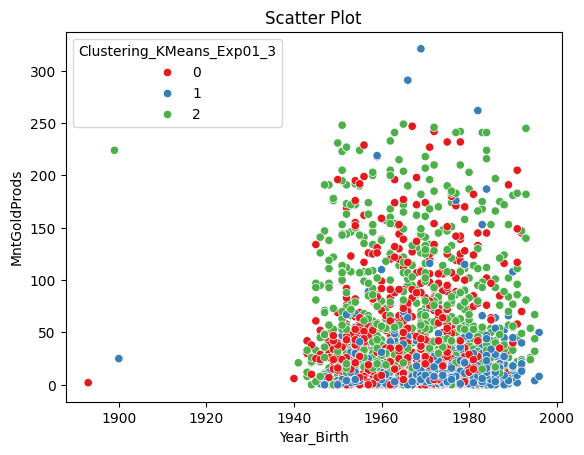

In [ ]:
    sns.scatterplot(data=df0, x='Year_Birth', y='MntGoldProds', hue='Clustering_KMeans_Exp01_3', palette='Set1')
    plt.title('Scatter Plot')
    plt.show()

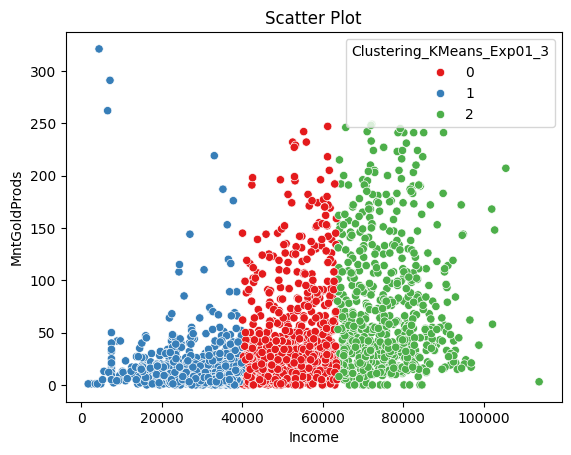

In [ ]:
    sns.scatterplot(data=df0, x='Income', y='MntGoldProds', hue='Clustering_KMeans_Exp01_3', palette='Set1')
    plt.title('Scatter Plot')
    plt.show()

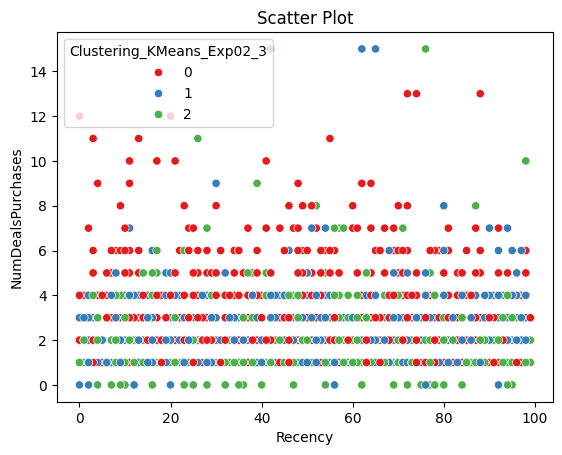

In [95]:
    sns.scatterplot(data=df0, x='Recency', y='NumDealsPurchases', hue='Clustering_KMeans_Exp02_3', palette='Set1')
    plt.title('Scatter Plot')
    plt.show()

In [99]:
cluster_means = df0[['Year_Birth','Income','Kidhome','Teenhome','Recency','Complain','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','Clustering_KMeans_Exp01_3']].groupby('Clustering_KMeans_Exp01_3').mean()
print(cluster_means)
pd

                            Year_Birth        Income   Kidhome  Teenhome  \
Clustering_KMeans_Exp01_3                                                  
0                          1966.119423  51691.110236  0.416010  0.817585   
1                          1973.088919  28186.573187  0.811218  0.307798   
2                          1967.293706  75544.142657  0.092308  0.377622   

                             Recency  Complain    MntWines  MntFruits  \
Clustering_KMeans_Exp01_3                                               
0                          49.603675  0.005249  273.493438  17.695538   
1                          48.355677  0.016416   29.924761   5.923393   
2                          49.058741  0.006993  623.208392  56.720280   

                           MntMeatProducts  MntFishProducts  MntSweetProducts  \
Clustering_KMeans_Exp01_3                                                       
0                                92.068241        24.160105         17.040682   
1         

<module 'pandas' from 'd:\\Data-Analysis-and-Science\\.venv\\Lib\\site-packages\\pandas\\__init__.py'>

In [96]:
cluster_means = df0[['Year_Birth','Income','Kidhome','Teenhome','Recency','Complain','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Clustering_KMeans_Exp02_3']].groupby('Clustering_KMeans_Exp02_3').mean()
print(cluster_means)
pd

                            Year_Birth        Income   Kidhome  Teenhome  \
Clustering_KMeans_Exp02_3                                                  
0                          1966.119423  51691.110236  0.416010  0.817585   
1                          1973.088919  28186.573187  0.811218  0.307798   
2                          1967.293706  75544.142657  0.092308  0.377622   

                             Recency  Complain  NumDealsPurchases  \
Clustering_KMeans_Exp02_3                                           
0                          49.603675  0.005249           3.098425   
1                          48.355677  0.016416           2.142271   
2                          49.058741  0.006993           1.661538   

                           NumWebPurchases  NumCatalogPurchases  \
Clustering_KMeans_Exp02_3                                         
0                                 4.628609             2.166667   
1                                 2.147743             0.525308   
2    

<module 'pandas' from 'd:\\Data-Analysis-and-Science\\.venv\\Lib\\site-packages\\pandas\\__init__.py'>

In [98]:
cluster_means = df0[['Year_Birth','Income','Kidhome','Teenhome','Recency','Complain','AcceptedCmp1','Response','Clustering_KMeans_Exp03_3']].groupby('Clustering_KMeans_Exp03_3').mean()
print(cluster_means)
pd

                            Year_Birth        Income   Kidhome  Teenhome  \
Clustering_KMeans_Exp03_3                                                  
0                          1966.119423  51691.110236  0.416010  0.817585   
1                          1973.088919  28186.573187  0.811218  0.307798   
2                          1967.293706  75544.142657  0.092308  0.377622   

                             Recency  Complain  AcceptedCmp1  Response  
Clustering_KMeans_Exp03_3                                               
0                          49.603675  0.005249      0.017060  0.104987  
1                          48.355677  0.016416      0.001368  0.116279  
2                          49.058741  0.006993      0.179021  0.234965  


<module 'pandas' from 'd:\\Data-Analysis-and-Science\\.venv\\Lib\\site-packages\\pandas\\__init__.py'>

In [100]:
df0[df0['Clustering_KMeans_Exp01_3']==0][['Year_Birth','Income','Kidhome','Teenhome','Recency','Complain','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].describe(include="all")

,Year_Birth,Income,Kidhome,Teenhome,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,1966.119423,51691.110236,0.416010,0.817585,49.603675,0.005249,273.493438,17.695538,92.068241,24.160105,17.040682,44.073491
std,10.922985,6901.216803,0.534149,0.483152,28.694785,0.072309,252.279064,30.433343,98.445276,39.867264,28.725392,48.360259
min,1893.000000,39996.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1957.000000,45890.250000,0.000000,1.000000,25.000000,0.000000,70.250000,1.000000,24.000000,2.000000,0.000000,10.000000
50%,1967.000000,51498.500000,0.000000,1.000000,51.000000,0.000000,200.500000,6.000000,64.000000,8.000000,6.000000,27.000000
75%,1974.750000,57615.750000,1.000000,1.000000,74.000000,0.000000,393.000000,18.000000,124.750000,28.000000,19.000000,58.000000
max,1992.000000,63564.000000,2.000000,2.000000,99.000000,1.000000,1241.000000,199.000000,706.000000,259.000000,192.000000,247.000000


In [101]:
df0[df0['Clustering_KMeans_Exp01_3']==0]['Education'].value_counts(normalize=True)

Education
Graduation    0.477690
PhD           0.251969
Master        0.190289
2n Cycle      0.080052
Name: proportion, dtype: float64

In [104]:
df0[df0['Clustering_KMeans_Exp01_3']==0]['Marital_Status'].value_counts(normalize=True)

Marital_Status
Married     0.383202
Together    0.257218
Single      0.198163
Divorced    0.111549
Widow       0.045932
YOLO        0.002625
Alone       0.001312
Name: proportion, dtype: float64

In [105]:
df0[df0['Clustering_KMeans_Exp01_3']==0]['Dt_Customer'].value_counts(normalize=True)

Dt_Customer
2013    0.552493
2012    0.225722
2014    0.221785
Name: proportion, dtype: float64